In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# DATA EXTRACTION

In [8]:
df = pd.read_csv('cal_housing.csv')

# DATA EXPLORATION

In [73]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [75]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [76]:
# Automated program :- Missing Values for each COLUMN
column_list = df.columns
non_null_column_values = [columns for columns in df.columns if df[columns].isnull().sum()<1] 
for attribute in non_null_column_values:
    print(attribute,':' ,np.round(df[attribute].isnull().sum().mean(), 4),'% missing values')
print('\n')
print('non null columns', non_null_column_values) 
print('\n')
null_column_values = [columns for columns in df.columns if df[columns].isnull().sum()>1 ] 
print('NULL COLUMNS == ', null_column_values)

print('Columns with NO NULL Values== ', len(non_null_column_values))
print('Columns with NULL values ==', len(null_column_values))
# INFERENCE : No columns have any missing values

longitude : 0.0 % missing values
latitude : 0.0 % missing values
housing_median_age : 0.0 % missing values
total_rooms : 0.0 % missing values
population : 0.0 % missing values
households : 0.0 % missing values
median_income : 0.0 % missing values
median_house_value : 0.0 % missing values
ocean_proximity : 0.0 % missing values


non null columns ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


NULL COLUMNS ==  ['total_bedrooms']
Columns with NO NULL Values==  9
Columns with NULL values == 1


In [77]:
df[df.total_bedrooms.isnull()== True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


# Categorizing into income groups

In [78]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [79]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [80]:
df1= df.copy()
df2 = df.copy()

Working of Simple Imputer is illustrated in the code bloack below

In [7]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")
#housing_num = df1.drop("ocean_proximity", axis=1)
#imputer.fit(housing_num)

The SimpleImputer function of Sklearn is very commonly used to handle with missing values with a specific value.
But since we are dealing with 5 different strata of  income category we will use MEDIAN_BEDROOMS for the particular
income strata the record belongs to in order to increase the efficacy of our predictive model .

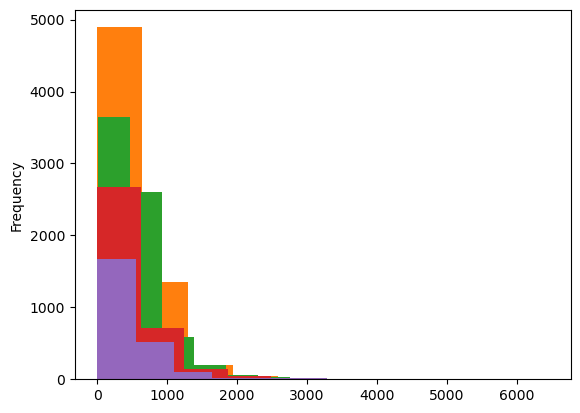

In [83]:
tmp1 = df2.groupby(['income_cat'])['total_bedrooms'].plot(kind = 'hist')
# since the total_bedrooms follow a highly right skewed distribution we will use MEDIAN AS MEASURE OF CENTRAL TENDENCY

##  MISSING VALUES HANDLING 

In [84]:
tmp2 = df2.groupby(['income_cat'])['total_bedrooms'].quantile(0.5).to_frame('avg_tb')
tmp2

,avg_tb
income_cat,
1,364.5
2,445.0
3,455.0
4,428.0
5,394.0


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [86]:
null_lst = df2[df2.iloc[:,4].isnull()== True].index
for i in null_lst:
    if (df2.iloc[i,10] == 1):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[1])
    elif (df2.iloc[i,10] == 2):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[2])
    elif (df2.iloc[i,10] == 3):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[3])
    elif (df2.iloc[i,10] == 4):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[4])
    elif (df2.iloc[i,10] == 5):
        df2.iloc[int(i),4] = int(tmp2.avg_tb[5])

In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20640 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


### Assigning appropiate data-types

In [88]:
df2.total_rooms = df2.total_rooms.astype(int)
df2.total_bedrooms =df2.total_bedrooms.astype(int)
df2.households =df2.households.astype(int)

In [90]:
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,INLAND,2


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

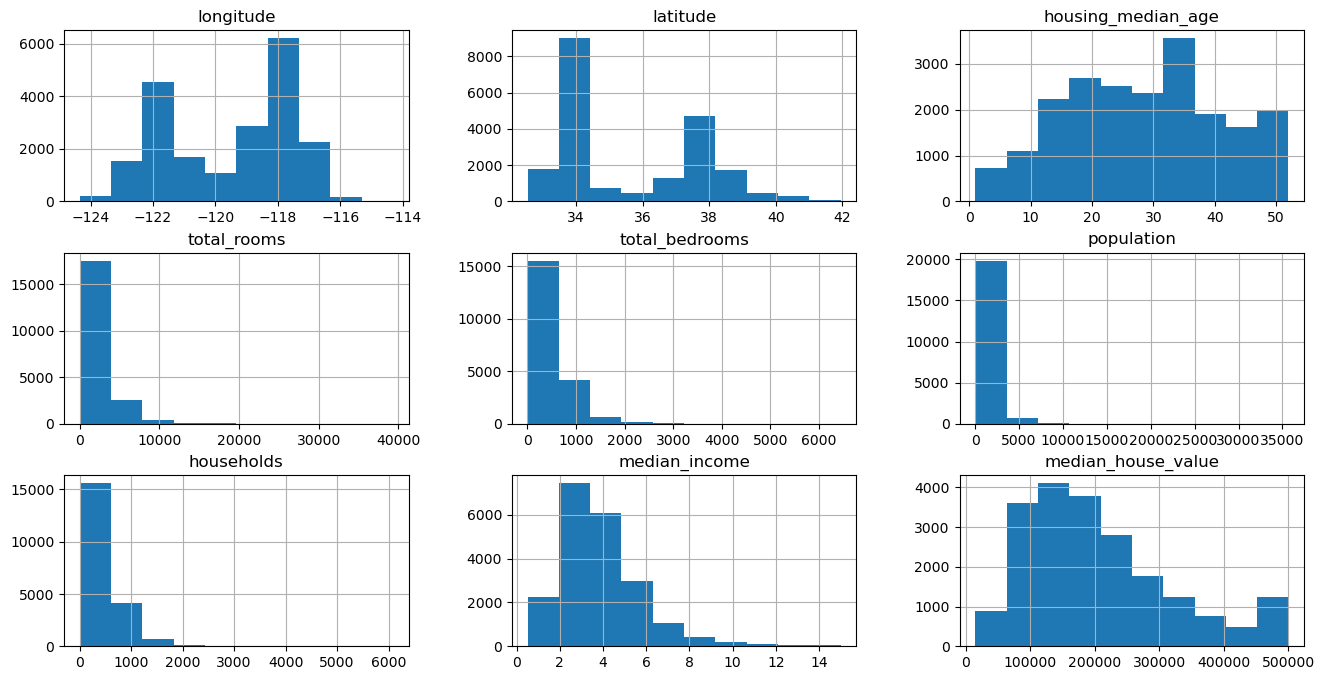

In [91]:
df2.hist(figsize = (16,8))

C:\Users\user\AppData\Local\Temp\ipykernel_2944\2786037966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot = True,cmap = 'YlGnBu')


<Axes: >

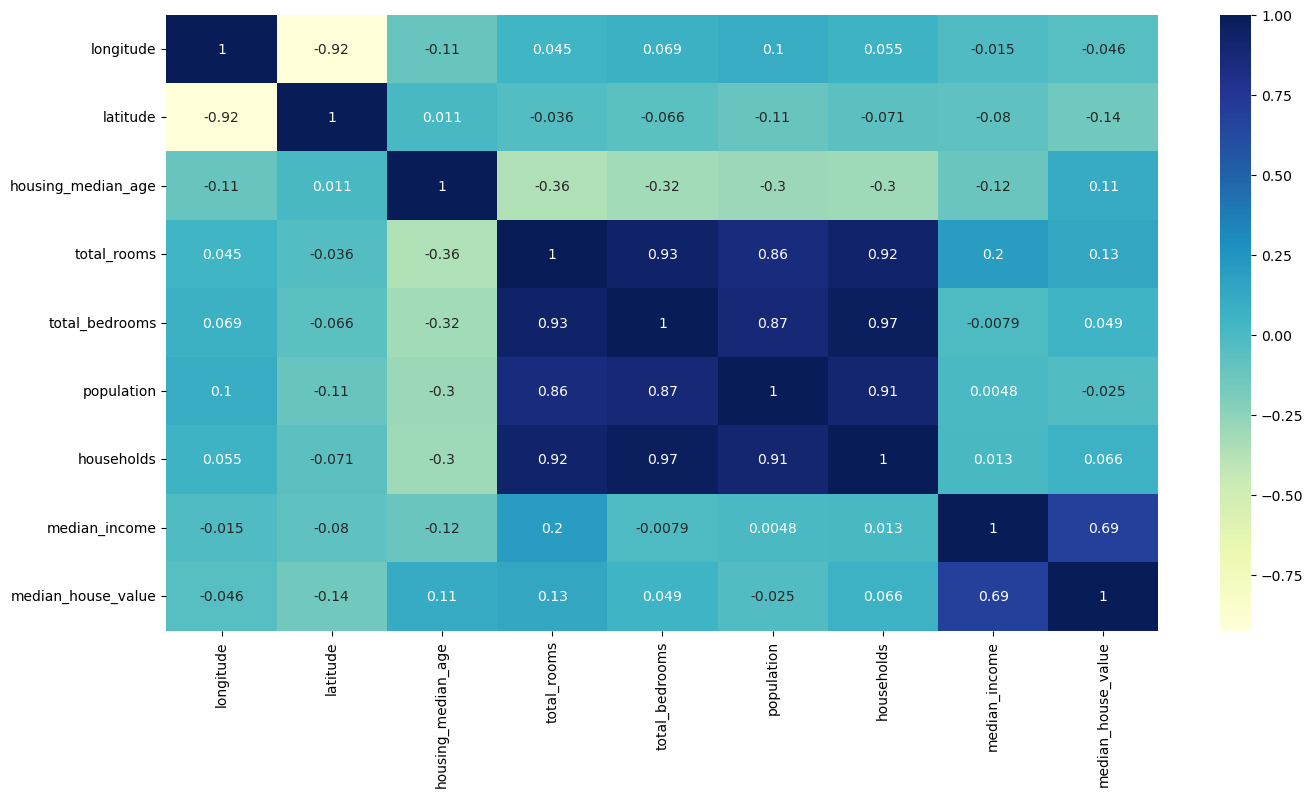

In [92]:
plt.figure(figsize = (16,8))
sns.heatmap(df2.corr(),annot = True,cmap = 'YlGnBu')

<Figure size 5000x5000 with 0 Axes>

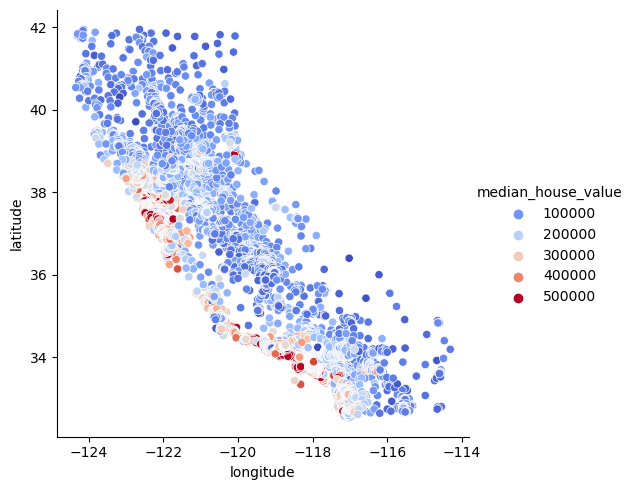

In [93]:
plt.figure(figsize = (50,50))
sns.relplot(data= df2,x= 'longitude',y= 'latitude',hue= 'median_house_value',palette = 'coolwarm')

# DATA PREPARATION

## OUTLIER REMOVAL

In [94]:
Df = df2.copy()
print('The original dataset has', len(Df),' rows; including the HOUSE PRICE OUTLIERS')

The original dataset has 20640  rows; including the HOUSE PRICE OUTLIERS


<Axes: >

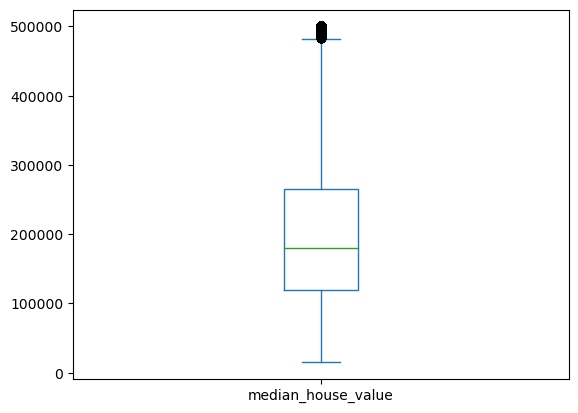

In [95]:
Df.median_house_value.plot(kind= 'box')

In [96]:
q1 = Df.median_house_value.quantile(0.25)
q3 = Df.median_house_value.quantile(0.75)
iqr = q3-q1
print('After outlier removal the remaining no. of rows ',len(Df[(Df.median_house_value <=(q3+ (1.5*iqr))) & (Df.median_house_value >= (q1- (1.5*iqr)))]))

After outlier removal the remaining no. of rows  19569


In [97]:
# Df = Df[(Df.median_house_value <=(q3+ (1.5*iqr))) & (Df.median_house_value >= (q1- (1.5*iqr)))]
# But we will not remove outliers

In [98]:
Df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,INLAND,2


# Feature Engineering

In [99]:
# ALL the features have the suitable data-type

In [100]:
# Adding a few new features using current features
Df['room_p_house'] =Df.total_rooms /Df.households 
Df['bed_p_room'] = Df.total_bedrooms / Df.total_rooms
Df['pop_p_house'] = Df.population/ Df.households

In [101]:
Df.reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_p_house,bed_p_room,pop_p_house
0,0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


C:\Users\user\AppData\Local\Temp\ipykernel_2944\3431675108.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Df.corr(),annot = True)


<Axes: >

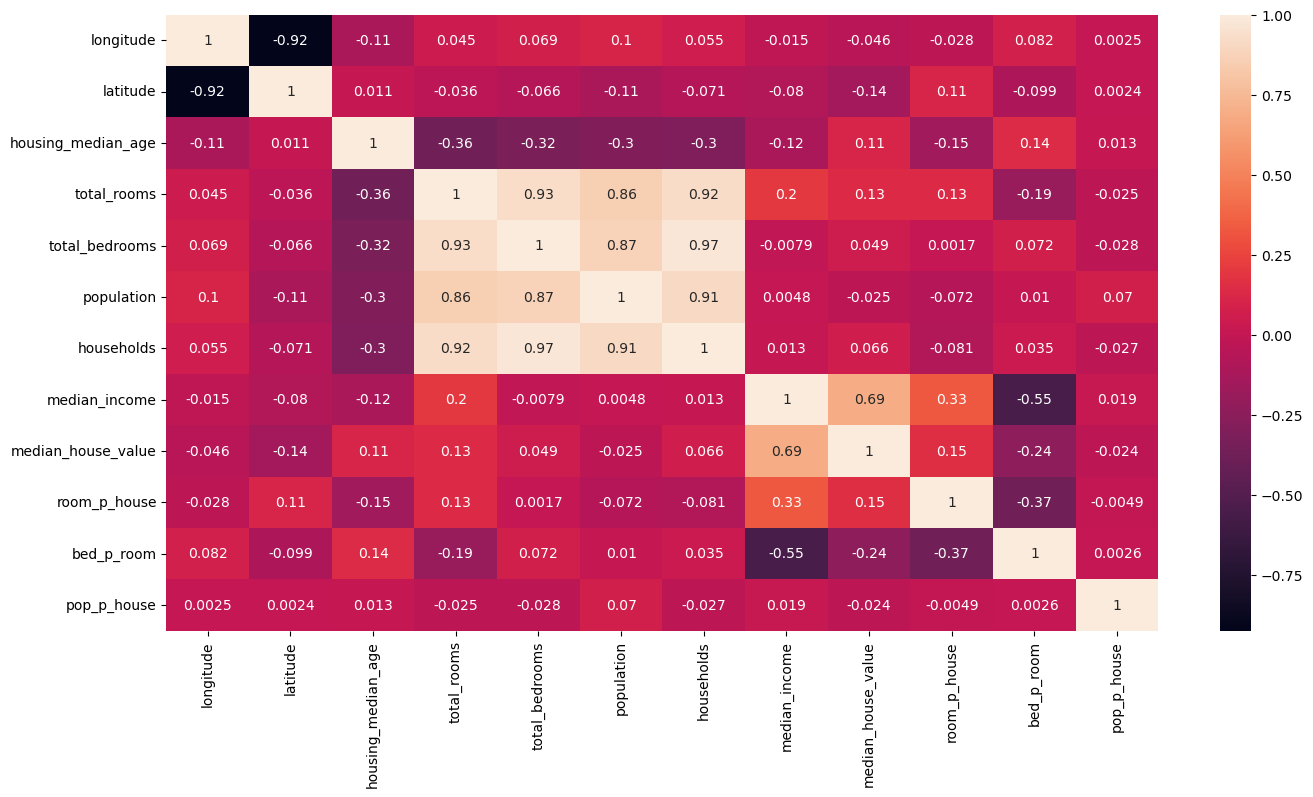

In [102]:
plt.figure(figsize = (16,8))
sns.heatmap(Df.corr(),annot = True)

### Categorical Features Conversion to NUMERICAL DATA TYPE USING ENCODING

In [103]:
Df = Df.join(pd.get_dummies(Df.ocean_proximity))

In [104]:
Df.drop(['ocean_proximity'],axis = 1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,room_p_house,bed_p_room,pop_p_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,5,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,5,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,5,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,4,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,3,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374,845.0,330,1.5603,78100.0,2,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18.0,697,150,356.0,114,2.5568,77100.0,2,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17.0,2254,485,1007.0,433,1.7000,92300.0,2,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18.0,1860,409,741.0,349,1.8672,84700.0,2,5.329513,0.219892,2.123209,0,1,0,0,0


In [105]:
cor= Df.corr()
cor['median_house_value'].sort_values(ascending = False)

C:\Users\user\AppData\Local\Temp\ipykernel_2944\416762164.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor= Df.corr()


median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
room_p_house          0.151948
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049272
ISLAND                0.023416
pop_p_house          -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bed_p_room           -0.236044
INLAND               -0.484859
Name: median_house_value, dtype: float64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'room_p_house'}>,
        <Axes: title={'center': 'bed_p_room'}>,
        <Axes: title={'center': 'pop_p_house'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

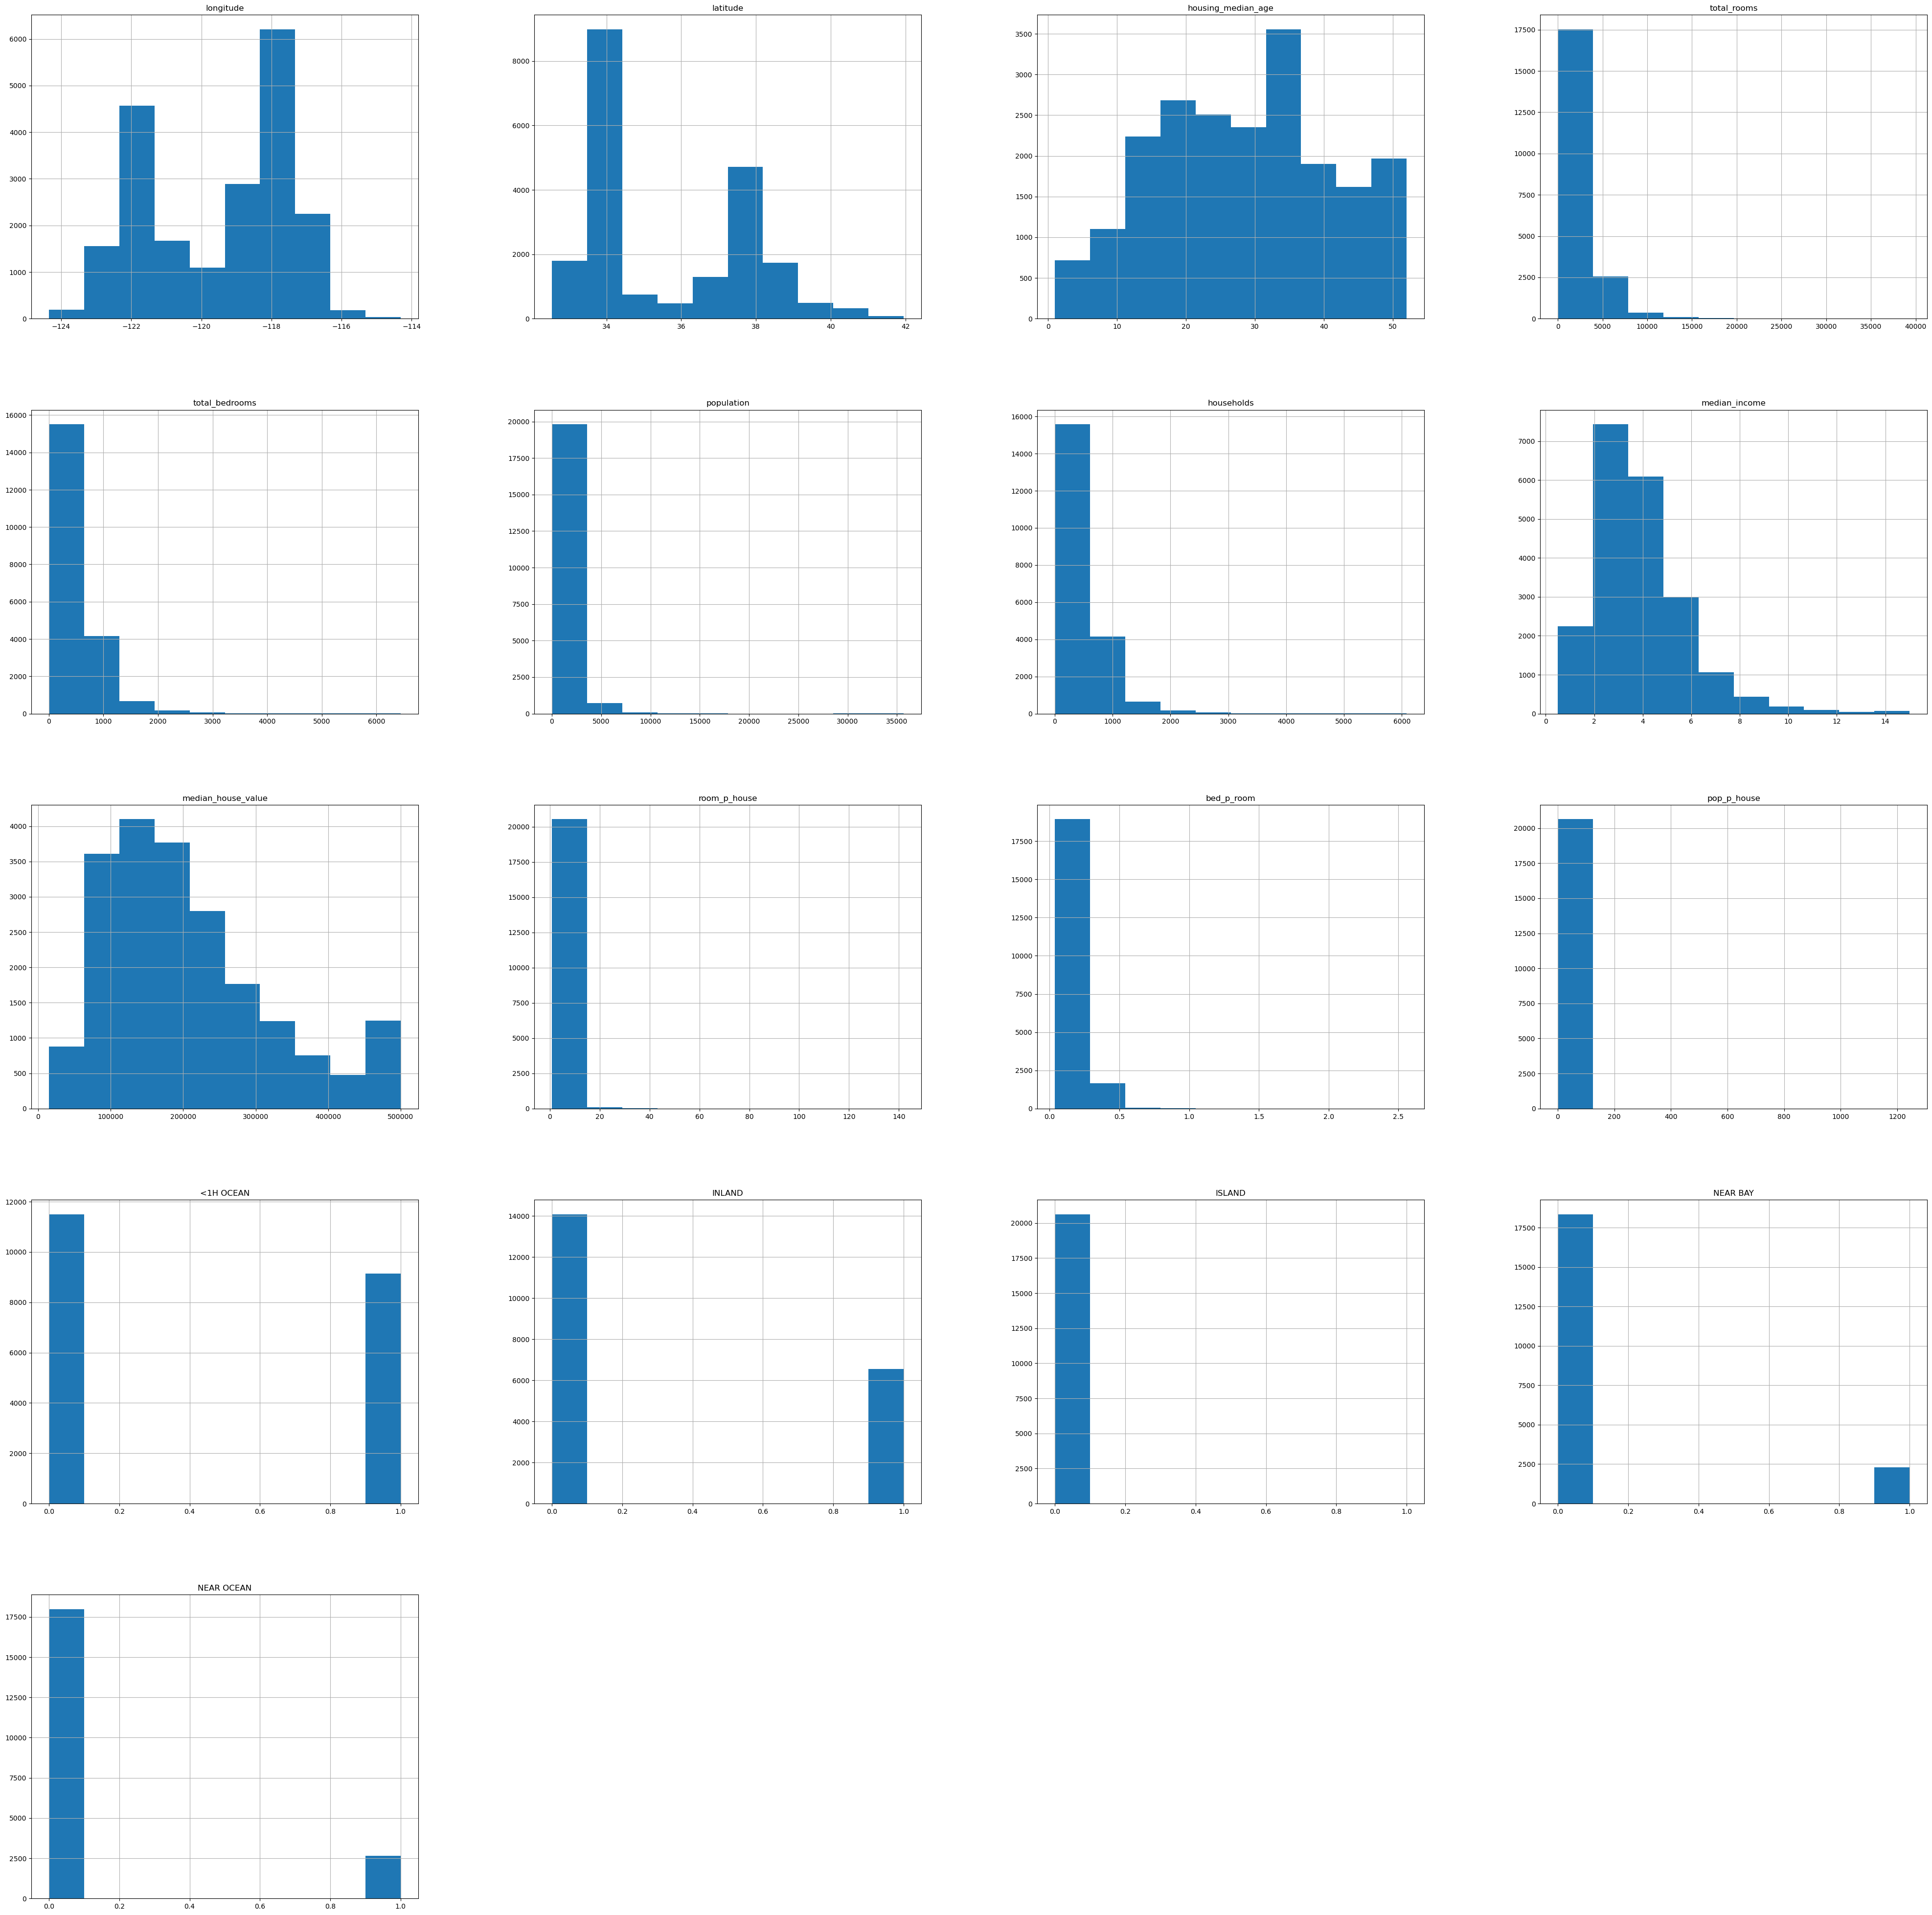

In [106]:
Df.hist(figsize = (50,50))

In [107]:
Df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,room_p_house,bed_p_room,pop_p_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880,129,322.0,126,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099,1106,2401.0,1138,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467,190,496.0,177,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274,235,558.0,219,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627,280,565.0,259,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467,0,0,0,1,0


In [108]:
Df.total_rooms = np.log(Df.total_rooms+1)
Df.total_bedrooms = np.log(Df.total_bedrooms+1)
Df.population = np.log(Df.population+1)
Df.households = np.log(Df.households+1)

In [109]:
Df = Df.drop(['ocean_proximity'],axis = 1)

In [110]:
Df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,room_p_house,bed_p_room,pop_p_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,5,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,5,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,5,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,4,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,3,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,2,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,2,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,2,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,2,5.329513,0.219892,2.123209,0,1,0,0,0


In [111]:
Df2= Df.copy()

# TRAIN_TEST_SPLIT

In [112]:
import sklearn 
from sklearn.model_selection import train_test_split

In [113]:
st_train_set, st_test_set = train_test_split(
    Df, test_size=0.2, stratify=Df["income_cat"], random_state=42)

In [114]:
st_train_set , st_val_set = train_test_split(st_train_set,test_size = 0.05, stratify = st_train_set["income_cat"],random_state = 42)

In [115]:
X_train = st_train_set.drop(['median_house_value'],axis = 1)
X_val = st_val_set.drop(['median_house_value'],axis =1)
X_test = st_test_set.drop(['median_house_value'],axis =1)

y_train = st_train_set['median_house_value']
y_val = st_val_set['median_house_value']
y_test = st_test_set['median_house_value']

In [116]:
print(X_train.shape,
X_val.shape,
X_test.shape)

(15686, 17) (826, 17) (4128, 17)


In [117]:
X_test.iloc[500:1500,:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,room_p_house,bed_p_room,pop_p_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15190,-117.06,33.02,17.0,7.877018,5.966147,6.902743,5.886104,5.8966,4,7.339833,0.147628,2.768802,1,0,0,0,0
6890,-118.10,34.05,31.0,8.177516,6.599870,7.998335,6.573680,3.7560,3,4.977622,0.206238,4.160839,1,0,0,0,0
11287,-117.95,33.80,34.0,7.411556,5.655992,6.809039,5.680173,4.6389,4,5.664384,0.172310,3.099315,1,0,0,0,0
8089,-118.21,33.81,43.0,6.809039,5.298317,6.639876,5.323010,3.3214,3,4.436275,0.219890,3.745098,0,0,0,0,1
14,-122.26,37.85,52.0,7.880048,6.440947,7.100852,6.431331,1.9167,2,4.262903,0.236852,1.954839,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,-118.38,34.19,42.0,7.177019,5.669881,6.857514,5.713733,2.7379,2,4.331126,0.220948,3.145695,1,0,0,0,0
747,-122.09,37.66,40.0,7.201171,5.749393,6.642487,5.605802,3.4722,3,4.944649,0.233582,2.826568,0,0,0,1,0
2534,-122.05,39.60,34.0,7.626570,5.837730,6.865891,5.777652,2.8466,2,6.369565,0.166748,2.975155,0,1,0,0,0
14649,-117.20,32.77,30.0,5.056246,3.828641,4.356709,3.713572,3.2679,3,3.900000,0.288462,1.925000,0,0,0,0,1


In [118]:
y_test

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: median_house_value, Length: 4128, dtype: float64

In [119]:
X_train.drop(['income_cat'],axis = 1,inplace = True)
X_test.drop(['income_cat'],axis = 1,inplace = True)
X_val.drop(['income_cat'],axis = 1,inplace = True)

## Conversion from Pandas DataFrame to Numpy Arrays :
   For faster computation

In [120]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

In [121]:
# all the training datasets are converted to NUMPY 2_D ARRAYS for preprocessing using STANDARD_SCALER

# Preprocessing using StandardScaler()

In [122]:
X_train

array([[-117.94,   33.73,   24.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.05,   32.97,   17.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.46,   34.24,   11.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [-119.77,   36.32,   14.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.47,   33.99,   37.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.46,   34.16,   28.  , ...,    0.  ,    0.  ,    0.  ]])

In [123]:
from sklearn.preprocessing import StandardScaler 
import numpy as np
scaler = StandardScaler().fit(X_train[:,:11])

def preprocessor(X):
    A= np.copy(X)
    A[:,:11]=scaler.transform(A[:,:11]) # ONLY THE NUMERICAL FEATURES : CATEGORICAL FEATURES NOT INCLUDED
    return A
X_train_pp=preprocessor(X_train)

In [124]:
pd.DataFrame(X_train_pp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.815039,-0.890922,-0.371815,0.962375,0.733015,1.074613,0.818593,0.725271,0.163098,-0.660269,0.029661,1.0,0.0,0.0,0.0,0.0
1,1.259307,-1.246058,-0.928209,2.118837,1.699365,1.970051,1.764814,0.899675,0.588914,-1.066079,0.022245,1.0,0.0,0.0,0.0,0.0
2,0.555467,-0.652607,-1.405119,1.292300,1.401728,1.238198,1.331311,-0.009336,-0.097238,0.040576,-0.034725,1.0,0.0,0.0,0.0,0.0
3,-1.436251,0.968867,1.853763,-0.287309,-0.383716,-0.043047,-0.265859,-0.009336,-0.135174,-0.301723,0.019117,0.0,0.0,0.0,0.0,1.0
4,0.745154,-0.694663,-0.053875,-2.895334,-2.756309,-2.806347,-3.487690,-1.774076,0.840488,0.465224,0.124255,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,1.174447,-1.325496,-0.451300,-0.099780,0.296822,-0.116427,0.300427,-0.497131,-0.588463,0.957255,-0.084861,0.0,0.0,0.0,0.0,1.0
15682,0.136158,-0.629243,-0.212845,0.779973,1.096616,1.234278,1.092172,-1.023337,-0.463934,0.629500,0.007198,0.0,0.0,0.0,0.0,1.0
15683,-0.098456,0.319343,-1.166664,0.678975,0.524023,0.694593,0.605233,0.061234,0.041647,-0.494596,-0.004500,0.0,1.0,0.0,0.0,0.0
15684,0.550475,-0.769428,0.661489,0.065415,0.738825,-0.048070,0.660644,-0.246429,-0.776262,1.873558,-0.118282,1.0,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>]],
      dtype=object)

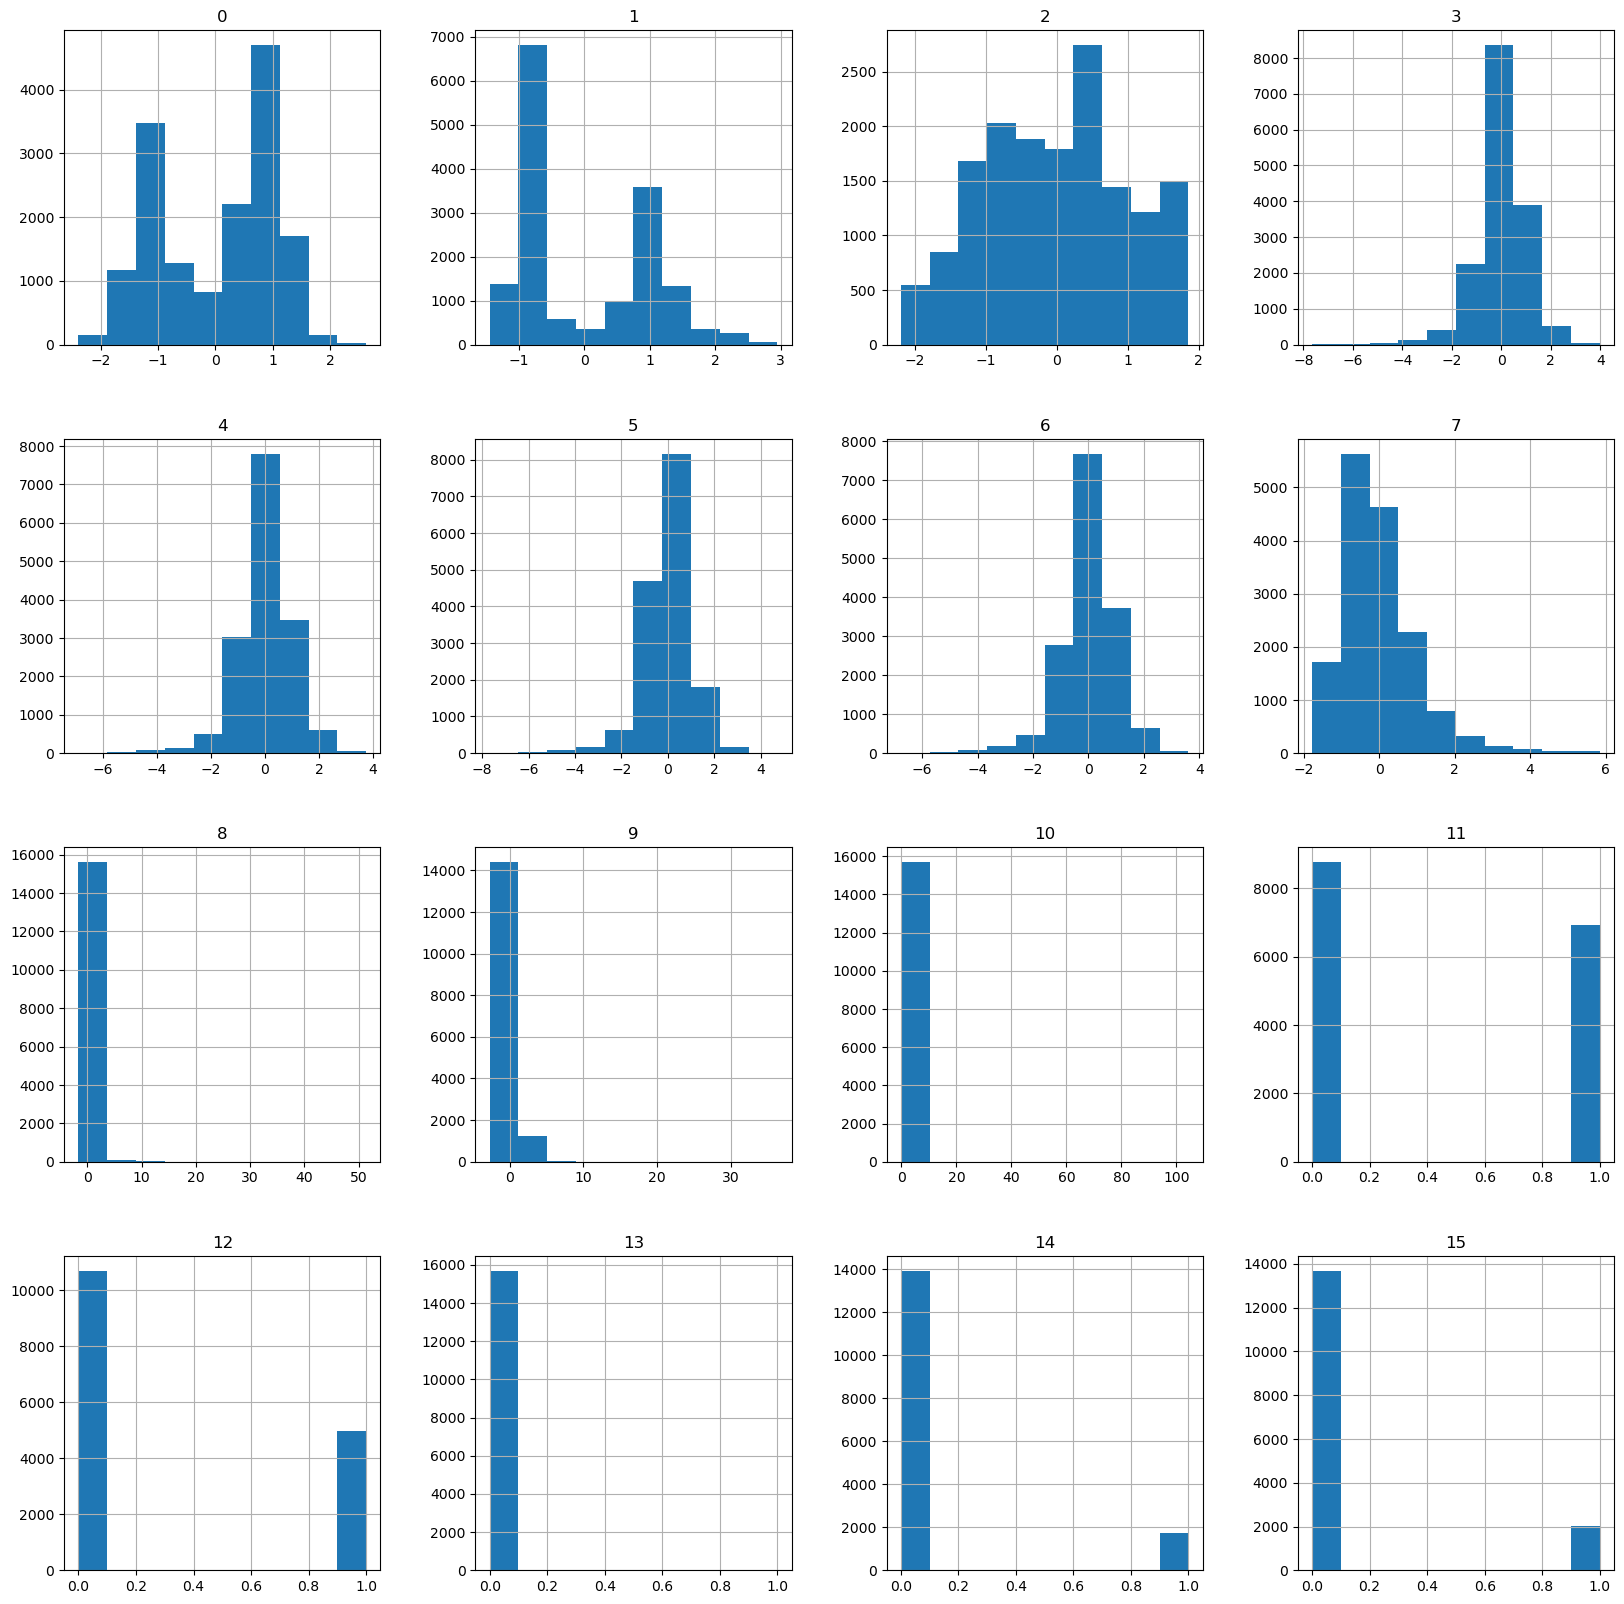

In [125]:
pd.DataFrame(X_train_pp).hist(figsize = (20,20))

In [126]:
X_test_pp=preprocessor(X_test)

In [127]:
X_val_pp=preprocessor(X_val)

# MODEL FITTING

## Linear Regression

In [57]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
lin_reg = reg.fit(X_train_pp , y_train)
lin_reg.score(X_train_pp,y_train)
print('TRAINING MSE ',mse(lin_reg.predict(X_train_pp),y_train,squared = False))
print('SINGLE SET VALIDATION ERROR',mse(lin_reg.predict(X_val_pp),y_val,squared = False))
from sklearn.model_selection import cross_val_score
# computes the error stats for the linear model
            # negative cross_val (intializer of the ML model, X_train_pp,y_train,scoring = 'neg_root_mse',cv = no. of folds / strata
            # each of which is used as a seperate validation set one by one
lin_rmses = -cross_val_score(reg, X_train_pp,y_train,
                              scoring="neg_root_mean_squared_error", cv=12)
pd.Series(lin_rmses).describe()
print('10 fold cross val error  = ',pd.Series(lin_rmses).mean())
print('SINCE TRAINING MSE slightly < cross_val_error HENCE SLIGHTLY OVERFITTING although very less ')

TRAINING MSE  66384.91899527457
SINGLE SET VALIDATION ERROR 69131.00319077735
10 fold cross val error  =  67132.01461236159
SINCE TRAINING MSE slightly < cross_val_error HENCE SLIGHTLY OVERFITTING although very less 


In [58]:
print('Linear Regression predictions')
pd.DataFrame( {'Yhat': reg.predict(X_train_pp),
 'Y':y_train})

Linear Regression predictions


,Yhat,Y
0,253772.475512,211400.0
1,258293.373456,194300.0
2,221476.618398,170700.0
3,242752.779499,261600.0
4,-271.476081,500001.0
...,...,...
15681,225493.641559,183300.0
15682,165320.305833,160500.0
15683,150278.459457,92500.0
15684,295786.826022,267500.0


## Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor as RFRe
rfr = RFRe(max_depth = 10)
rfr_reg = rfr.fit(X_train_pp,y_train)
print('TRAINING MSE : ',mse(rfr_reg.predict(X_train_pp),y_train,squared = False)
,' \n SINGLE SET VAL MSE :',mse(rfr_reg.predict(X_val_pp),y_val,squared = False))



TRAINING MSE :  41847.60270736102  
 SINGLE SET VAL MSE : 53168.55308016974


In [60]:
rfr_rmse = -cross_val_score(rfr , X_train_pp,y_train,scoring = "neg_root_mean_squared_error",cv = 15)
print('10 fold validation rmse ',pd.Series(rfr_rmse).mean())

10 fold validation rmse  53254.51276699299


In [61]:
pd.Series(rfr_rmse).describe()

count       15.000000
mean     53254.512767
std       3233.357906
min      47470.163070
25%      51299.664004
50%      52964.952122
75%      55020.020461
max      59369.852659
dtype: float64

Linear Regression is producing a significant error.
After roceeding with powerful ML RANDOM_FOREST_REGRESSOR_MODEL the training MSE is significantly lowered but there is a significant 
OVERFITTING in the RANDOM_FOREST MODEL

## Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 423)
gbr_reg = gbr.fit(X_train_pp,y_train)
print('TRAINING MSE : ',mse(gbr_reg.predict(X_train_pp),y_train,squared = False)
,' \n SINGLE SET VAL MSE :',mse(gbr_reg.predict(X_val_pp),y_val,squared = False))


TRAINING MSE :  41757.85988803411  
 SINGLE SET VAL MSE : 48013.435065924175


In [64]:
gbr_rmse = -cross_val_score(gbr,X_train_pp, y_train,scoring = "neg_root_mean_squared_error",cv = 6)
pd.Series(gbr_rmse).describe()

count        6.000000
mean     48710.981254
std       1649.916714
min      46990.097988
25%      47679.982145
50%      48109.904340
75%      49775.736020
max      51188.292864
dtype: float64

In [65]:
print('10 fold- cross -val_score is : ',pd.Series(gbr_rmse).mean())

10 fold- cross -val_score is :  48710.981254237624


In [70]:
mse(gbr_reg.predict(X_test_pp),y_test,squared = False)

46636.55310129265

# BEST MODEL SELECTION

Gradient Boosting Algorithm has lower training_mse as well as low (validation_error or cross_val_error)
Since RandomForestRegressor has low training_mse but relatively larger validation_mse hence it OVERFITS the data.

BEST MODEL FOR HOUSE PRICE PREDICTION is shown to be GradientBoostingRegressor since it is theoritically less likely to OVERFIT 
despite greater values of the no. of estimators. Since the data is very less noisy hence it is working robustly.

Also the cross validation scores namely MEAN as well as STANDARD EVIATION is significantly lesser for GradientBoostingRegressor
when compared to RandomForest or poorly performing LINEAR REGRESSION.

In [69]:
from sklearn.metrics import r2_score as r2

In [121]:
r2(gbr.predict(X_train_pp) , y_train)

0.8418192555675087

# IMPROVING THE GRADIENT BOOSTING REGRESSOR MODEL

## Grid Search

In [109]:
search_space = {"n_estimators" : [100,200,500],
        "max_depth": [3,5,7],
         "learning_rate" : [0.01,0.1,1]
        }

In [110]:
search_space

{'n_estimators': [100, 200, 500],
 'max_depth': [3, 5, 7],
 'learning_rate': [0.01, 0.1, 1]}

In [132]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(
    estimator = gbr,
    param_grid = search_space,
    scoring = ["r2","neg_mean_squared_error"],
    refit = "r2",
    cv=5,
    verbose = 4
)

In [112]:
gs.fit(X_train_pp,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-6089247128.027) r2: (test=0.533) total time=   4.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-5736346668.572) r2: (test=0.540) total time=   4.4s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-6321901222.185) r2: (test=0.537) total time=   4.3s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-5899283081.300) r2: (test=0.555) total time=   3.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-6813724783.724) r2: (test=0.529) total time=   3.9s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200; neg_mean_squared_error: (test=-4490441428.741) r2: (test=0.656) total time=   7.8s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimato

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(n_estimators=423),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'], verbose=4)

In [114]:
gs.best_estimator_

GradientBoostingRegressor(max_depth=7, n_estimators=500)

In [115]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

In [117]:
gs.best_score_

0.8394379801331736

In [119]:
gs_df = pd.DataFrame(gs.cv_results_)
gs_df= gs_df.sort_values("rank_test_r2",ascending =  True)

In [120]:
gs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_r2,split1_test_r2,...,std_test_r2,rank_test_r2,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
17,44.815382,0.873894,0.040618,0.007654,0.1,7,500,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.836438,0.840266,...,0.002145,1,-2.134976e+09,-1.991315e+09,-2.195199e+09,-2.080428e+09,-2.340783e+09,-2.148540e+09,1.171985e+08,1
16,21.458077,0.453918,0.024542,0.004660,0.1,7,200,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.834947,0.839036,...,0.003035,2,-2.154444e+09,-2.006647e+09,-2.250267e+09,-2.091459e+09,-2.402854e+09,-2.181134e+09,1.364834e+08,2
14,39.464549,1.756180,0.032525,0.003706,0.1,5,500,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.838084,0.838260,...,0.004157,3,-2.113494e+09,-2.016321e+09,-2.291405e+09,-2.083132e+09,-2.437908e+09,-2.188452e+09,1.543810e+08,3
15,11.470832,0.534547,0.016558,0.003005,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.830135,0.833610,...,0.003160,4,-2.217254e+09,-2.074297e+09,-2.326398e+09,-2.165619e+09,-2.496384e+09,-2.255990e+09,1.452075e+08,4
13,13.011202,0.027893,0.012799,0.000416,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.829037,0.830725,...,0.004683,5,-2.231587e+09,-2.110265e+09,-2.428434e+09,-2.198884e+09,-2.572453e+09,-2.308324e+09,1.680975e+08,5
11,19.787802,0.317883,0.016777,0.000413,0.1,3,500,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.829502,0.823641,...,0.003831,6,-2.225520e+09,-2.198573e+09,-2.425672e+09,-2.235757e+09,-2.576940e+09,-2.332492e+09,1.464051e+08,6
8,47.684418,0.183002,0.069073,0.002386,0.01,7,500,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.826352,0.822226,...,0.004520,7,-2.266632e+09,-2.216214e+09,-2.442853e+09,-2.300889e+09,-2.693199e+09,-2.383957e+09,1.719898e+08,7
12,6.589297,0.053404,0.007781,0.000400,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.820591,0.819422,...,0.004980,8,-2.341832e+09,-2.251169e+09,-2.567049e+09,-2.314181e+09,-2.709969e+09,-2.436840e+09,1.732624e+08,8
10,7.831639,0.017901,0.007977,0.001093,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.811368,0.806081,...,0.003984,9,-2.462226e+09,-2.417479e+09,-2.661782e+09,-2.441607e+09,-2.800253e+09,-2.556670e+09,1.496093e+08,9
5,35.404302,2.398535,0.045102,0.004880,0.01,5,500,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.803325,0.804136,...,0.006294,10,-2.567207e+09,-2.441729e+09,-2.806816e+09,-2.533295e+09,-3.012069e+09,-2.672223e+09,2.083590e+08,10


## Randomized Search (better)

In [133]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator = gbr,
    param_distributions = search_space,
    scoring = ["r2","neg_mean_squared_error"],
    refit = "r2",
    cv=5,
    n_iter = 8,
    verbose = 4
)

In [134]:
rs.fit(X_train_pp,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-6089789054.739) r2: (test=0.533) total time=   3.9s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-5736499415.139) r2: (test=0.540) total time=   3.8s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-6322361310.546) r2: (test=0.537) total time=   3.8s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-5899283081.300) r2: (test=0.555) total time=   3.9s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-6813724783.724) r2: (test=0.529) total time=   3.9s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=500; neg_mean_squared_error: (test=-2568077815.371) r2: (test=0.803) total time=  36.5s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(n_estimators=423),
                   n_iter=8,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 500]},
                   refit='r2', scoring=['r2', 'neg_mean_squared_error'],
                   verbose=4)

In [136]:
rs.best_estimator_

GradientBoostingRegressor(max_depth=7, n_estimators=200)

In [139]:
rs.best_params_

{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}

In [140]:
rs.best_score_

0.8375305979285036

# BEST MACHINE LEARNING MODEL

####  USING GRID SEARCH : 
gbr{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500} has  best_score = 0.8394379801331736
#### USING RANDOMIZED SEARCH : 
gbr{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1} has best_score =  0.8375305979285036

Randomized Search is considered to be a better algorithm for Hyperparameter Tuning and also the best_model obtained using RandomizedSearch is the second best in Grid Search results. The best_score difference is very little but computation time is reduced significantly since 
the model gbr{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1} uses 300 trees less than the other model.


In [167]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_new = GradientBoostingRegressor(n_estimators = 200,max_depth = 7,learning_rate = 0.1)
gbr_reg_new = gbr_new.fit(X_train_pp,y_train)


In [168]:
print('TRAINING MSE : ',mse(gbr_reg_new.predict(X_train_pp),y_train,squared = False)
,' \n SINGLE SET VAL MSE :',mse(gbr_reg_new.predict(X_val_pp),y_val,squared = False))

TRAINING MSE :  23218.35632639871  
 SINGLE SET VAL MSE : 45385.06084035356


In [169]:
gbr_new_rmses = -cross_val_score(gbr_new, X_train_pp,y_train,
                              scoring="neg_root_mean_squared_error", cv=12)

In [170]:
pd.DataFrame(gbr_new_rmses).describe()

,0
count,12.000000
mean,46439.629517
std,2643.923342
min,42250.595370
25%,44041.133969
50%,47468.408970
75%,47895.274617
max,50592.399023


## FINAL BEST MODEL : MSE comparison

In [171]:
print('TRAINING MSE : ',mse(gbr_reg_new.predict(X_train_pp),y_train,squared = False)
,' \n SINGLE SET VALIDATION  MSE :',mse(gbr_reg_new.predict(X_val_pp),y_val,squared = False))
print("\n12 Fold Cross Validation MSE : ",float(pd.DataFrame(gbr_new_rmses).mean() ))

TRAINING MSE :  23218.35632639871  
 SINGLE SET VALIDATION  MSE : 45385.06084035356

12 Fold Cross Validation MSE :  46439.629516834604


In [183]:
print(' Test Data Mean Squared Error : ',mse(gbr_reg_new.predict(X_test_pp),y_test,squared = False),
      ' \n Test data r2 Score',r2_score(gbr_new.predict(X_test_pp),y_test))

 Test Data Mean Squared Error :  44640.39169779811  
 Test data r2 Score 0.8207555661445515


# MODEL DEPLOYMENT 

In [184]:

import joblib

joblib.dump(gbr_new, "gbr_cal_house_prediction_1.pkl")

['gbr_cal_house_prediction_1.pkl']

In [65]:
import joblib


## LOADING THE LOCALLY SAVED MODEL

In [66]:
ml_model = joblib.load("gbr_cal_house_prediction_1.pkl")

In [67]:
Df3 = Df2.copy()

In [68]:
Df3 = Df3.drop(['income_cat','median_house_value'],axis =1)

In [69]:
Df3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_p_house,bed_p_room,pop_p_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,5.329513,0.219892,2.123209,0,1,0,0,0


# MODEL TESTING 

In [128]:
from sklearn.metrics import mean_squared_error as mse
mse(ml_model.predict(X_test_pp),y_test,squared = False)

44640.39169779811

In [131]:
dic1 = {"y_hat" :ml_model.predict(X_test_pp) , 'y': y_test }
after_model_deploy = pd.DataFrame(dic1)

In [132]:
after_model_deploy['% error'] = (after_model_deploy.y - after_model_deploy.y_hat)*100/after_model_deploy.y_hat

In [134]:
gbr_rec = after_model_deploy

In [137]:
gbr_rec.to_excel('Test Data Model Records.xlsx')

In [138]:
gbr_rec

,y_hat,y,% error
0,492247.772827,500001.0,1.575066
1,190036.380838,162500.0,-14.490057
2,189098.444407,204600.0,8.197611
3,168173.538255,159700.0,-5.038568
4,218800.033913,184000.0,-15.904949
...,...,...,...
4123,140965.765998,110000.0,-21.966870
4124,124177.193265,118800.0,-4.330258
4125,391960.145610,293800.0,-25.043400
4126,262180.184198,335700.0,28.041713
